# Uber Supply-Demand Gap

In this project , we are going to analyse the root cause of the problem (i.e. cancellation and non-availability of cars) and recommending ways to improve the situation. 

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline


import datetime 

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('Uber Request Data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [31]:
#renaming the column 
df.rename(columns = {'Request timestamp':'RequestTimestamp','Drop timestamp':'DropTimestamp'}, inplace = True) 

In [32]:
trip_status=df['Status'].value_counts()
print(trip_status)
df.isnull().sum()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


Request id             0
Pickup point           0
Driver id           2650
Status                 0
RequestTimestamp       0
DropTimestamp       3914
dtype: int64

### Observations :

"Driver id" column has 2650 missing as shown above and this is equal to the "No cars Available" trip status, which means when there is no driver id in the dataset because at the time of booking no car available.so this null value in the driver id is valid for this dataset."DropTimestamp" columns has 3914 missing values which is the sum of "No cars Available" & "Cancelled" 2650 + 1264 for which means that null value in the DropTimestamp value is valid for this dataset.

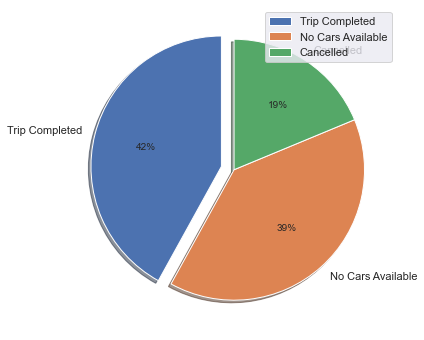

In [33]:
Labels=['Trip Completed','No Cars Available','Cancelled']
explode = (0.1, 0.0, 0.0)
fig = plt.figure(figsize =(6,6)) 
plt.pie(trip_status, labels = Labels,autopct='%1.0f%%',shadow=True, startangle=90,explode=explode) 
plt.legend(labels = Labels) 
plt.show()

### Observations :

There is a very big supply demand gap Only 42 percent of the total trip requests are being completed. There are a total of 19 percent trips that are being cancelled by the driver. There are 39 percent trip requests which are being turned down due to unavailabiltity of cars. Hence a bigger problem is car unavailability and need to be tackled depending on the where the request is coming from Airport or city.No cars available status is more frequent than the number of trips cancelled status.If someone would have thought that, due to drivers may cancel the trip cause the unavailablity of the Cab is not entirely True. But the problem is because of No cars available in most of the cases.

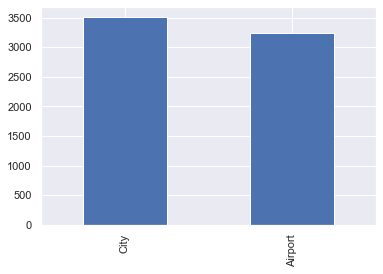

In [34]:
df['Pickup point'].value_counts().plot.bar()
plt.show()

### Observations :

From the above graph we can see that the Count of both pickup points from Airport and City are almost same.

In [35]:
df.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

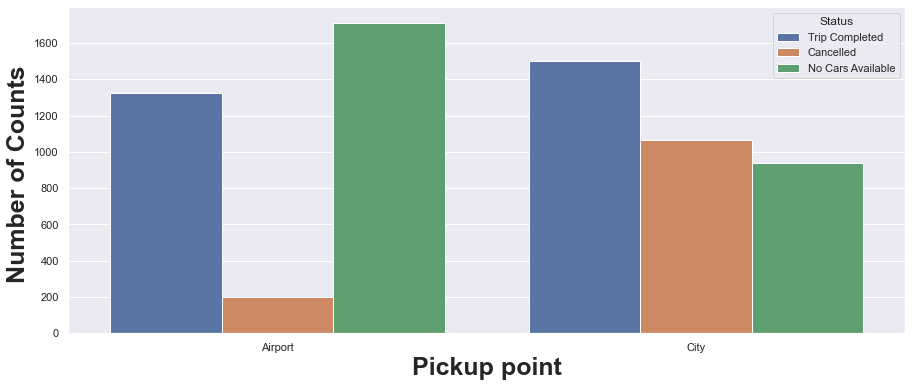

In [36]:
plt.rcParams['figure.figsize'] = [15,6]
sns.countplot(x=df['Pickup point'],hue =df['Status'] ,data = df)
plt.xlabel("Pickup point",fontweight = 'bold',size=25)
plt.ylabel("Number of Counts ",fontweight = 'bold',size=25)
plt.show()

### Observations :

From the above Graph we can See that :-
Pickup Point: Airport
1) No Cars Available status count is very high, It means the demand of car from airport to city is high.<br>
2) Cancelled status count is very low which is again obvious, Cabs in the Airport area are mostly waiting for the passangers from the Airport to city.<br>
Pickup Point: City
1) Cancelled status count is high due to either Driver doesn't want to go to the Airport or Passanger cancels the trip. It's all about choice here.<br>
2) No Cars Available status count is also high enough to create supply demand Gap, hence this is the problem look into.

In [37]:
# Correcting The Datetime format of "RequestTimestamp" and "DropTimestamp"
df['RequestTimestamp']=pd.to_datetime(df['RequestTimestamp'])
df['DropTimestamp']=pd.to_datetime(df['DropTimestamp'])

In [38]:
#creating the request hour and weekdays column.
df['Request Hour'] = df['RequestTimestamp'].dt.hour
df['weekday'] = df.RequestTimestamp.dt.day_name()
# +1 to make Monday=1.....until Sunday=7

In [39]:
df.head()

,Request id,Pickup point,Driver id,Status,RequestTimestamp,DropTimestamp,Request Hour,weekday
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday


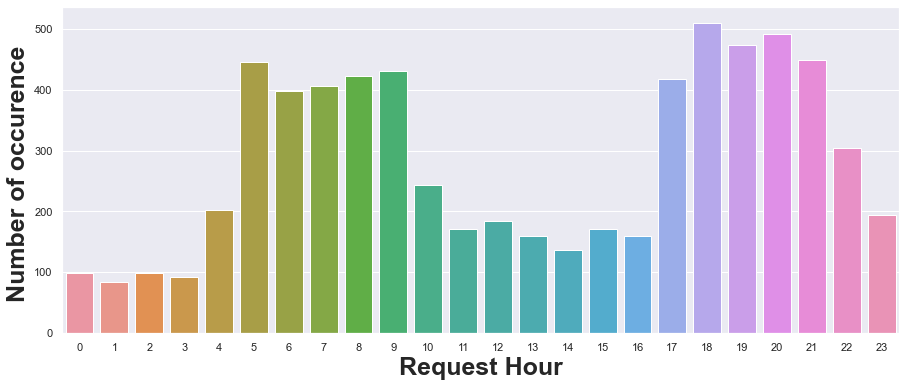

In [40]:
plt.rcParams['figure.figsize'] = [15,6]
sns.countplot(df['Request Hour'])
plt.xlabel("Request Hour",fontweight = 'bold',size=25)
plt.ylabel("Number of occurence ",fontweight = 'bold',size=25)
plt.show()

### Observations :

Above Graph Tells about why there is a problem of "No Cars Available"?<br>
As we can see in the above that most of the people requests for the car in the Morning or Evening Time.<br>
Morning and Evening are the time when there is to much of rush for the car booking.

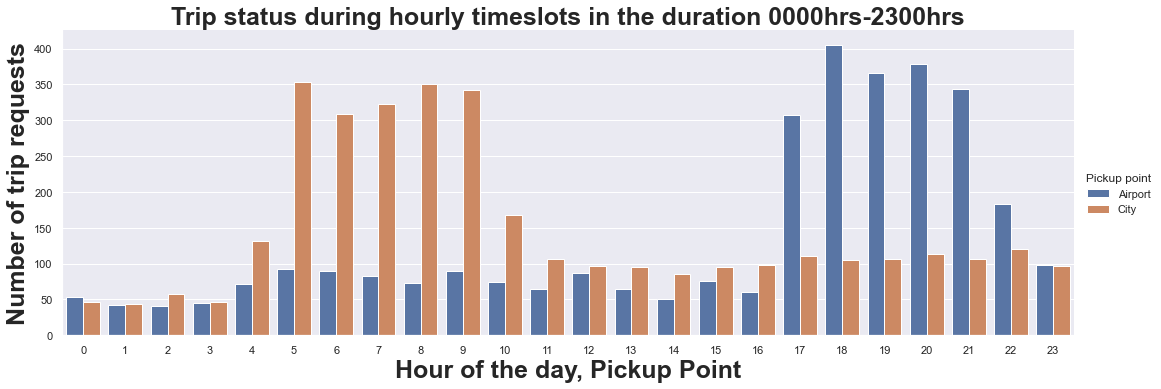

In [41]:
sns.factorplot(x = 'Request Hour', hue = 'Pickup point', data = df, kind = 'count', size=5, aspect=3)
plt.xlabel("Hour of the day, Pickup Point",fontweight = 'bold',size=25)
plt.ylabel("Number of trip requests",fontweight = 'bold',size=25)
plt.title("Trip status during hourly timeslots in the duration 0000hrs-2300hrs",fontweight = 'bold',size=25)
plt.show()

### Observations :

The demand of car from Airport to City is high in the evening time(5 pm to 9 pm), more than 350 requests and approx.<br>
The Demand of Car from Airport to city is high in the morning Time(5 am to 9 am), more than 300 requests and approx.

In [42]:
# Creating a ride slot on basis of 'Request timestamp'
time_hour = [0,5,10,17,21,24]
time_slots =['Early Morning','Morning_Time','Daytime','Evening_Time','Late_Night']
df['Time_slot'] = pd.cut(df['Request Hour'], bins = time_hour, labels = time_slots)

### Time Slot Details :

Early Morning : 00AM-5AM.<br>
Morning Time : 5AM-10AM.<br>
DayTime : 10AM-5PM.<br>
EveningTime : 5PM-9PM.<br>
Night : 10PM-12AM.

Text(0, 0.5, 'Number of occurence ')

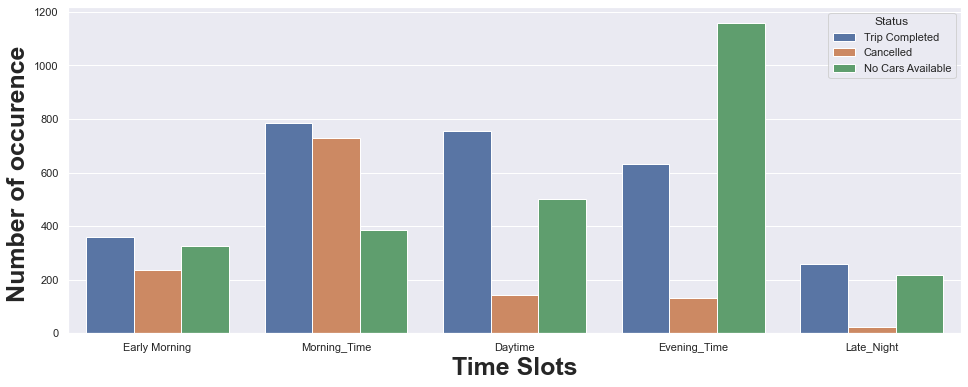

In [43]:
plt.rcParams['figure.figsize'] = [16,6]
sns.countplot(x = 'Time_slot', hue = 'Status', data = df)
plt.xlabel("Time Slots",fontweight = 'bold',size=25)
plt.ylabel("Number of occurence ",fontweight = 'bold',size=25)

### Observations :

Cars not available situation arises mostly in evening hours from airport to city or vice versa.<br>
Most of the Cancellation happens in morning hours fom city to airport or vice-versa.

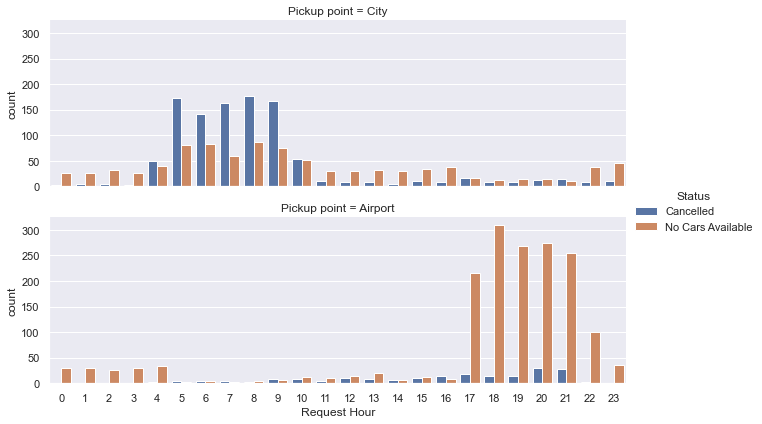

In [44]:
# plot hour w.r.t. status for different pickup points and identify the most pressing problems for Uber; Incomplete trips only
sns.factorplot(x = "Request Hour", hue = "Status", row = "Pickup point", data = df[df['Status']!='Trip Completed'], kind = "count", size=3, aspect=3)
plt.show()

### Observations : 

From The above graph we observe that:-

Uber is facing more number of 'No Car Available' issue at Airport in evening and night (5pm to 12am),which means At Airport, demand is higher than supply during evening and night.<br>
Uber is facing more number of cab 'Cancelled' issue in City during early morning and morning (4am to 10am), which means that In City, demand is greater than supply during early morning and morning (4am to 10am).

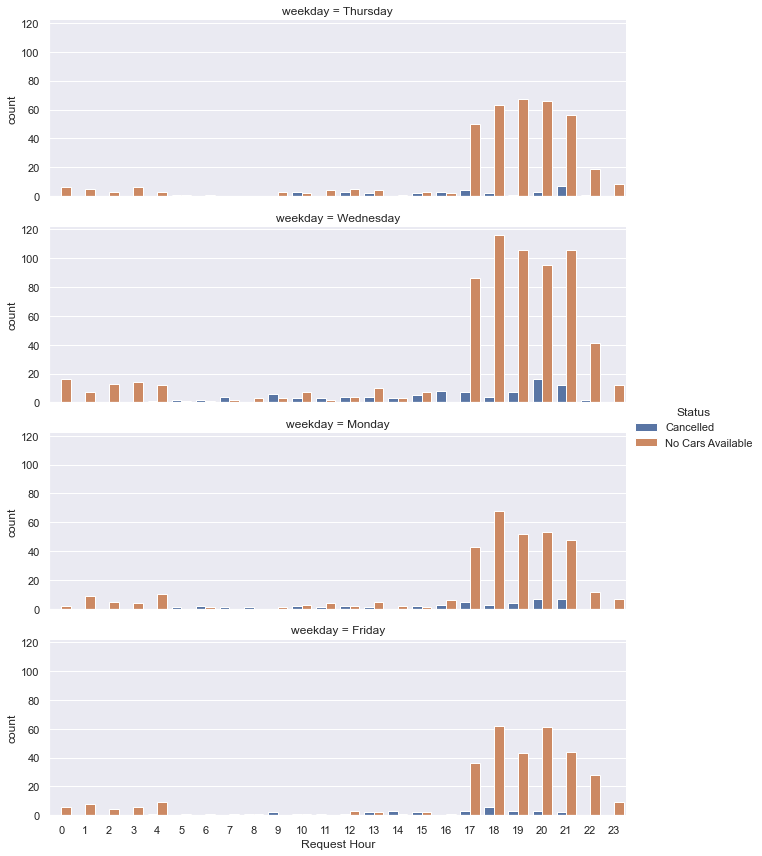

In [46]:
#plot of hour and day of week w.r.t. status,For pickup point Airport; Incomplete trip
sns.factorplot(x ="Request Hour", hue = "Status", row = "weekday", data = df[(df['Pickup point']=="Airport")&(df['Status']!='Trip Completed')], kind = "count", size=3, aspect=3)
plt.show()

### Observations :

From The above graph we observe that:-

Uber is facing similar problem across all days of week while travelling from airport to city that no car avalable in between from 5PM to 11PM.

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

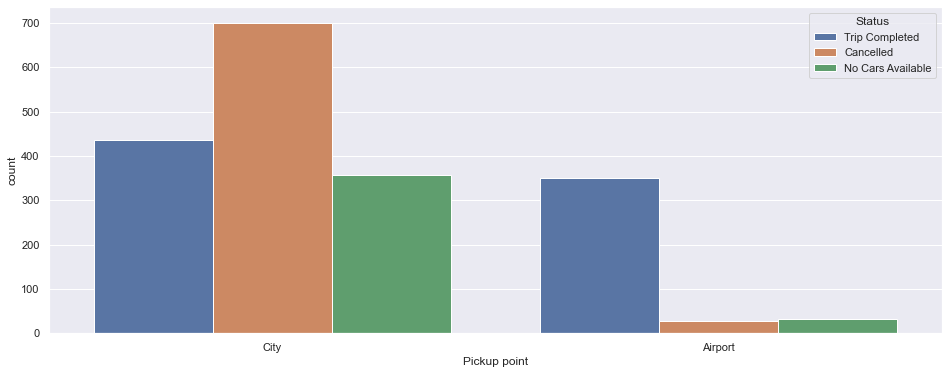

In [47]:
morning_rush = df[df['Time_slot'] == 'Morning_Time']
sns.countplot(x = 'Pickup point', hue = 'Status', data = morning_rush)

### Observations :

The Cancellation situation is a problem for the trip from City to airport in morning hours.

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

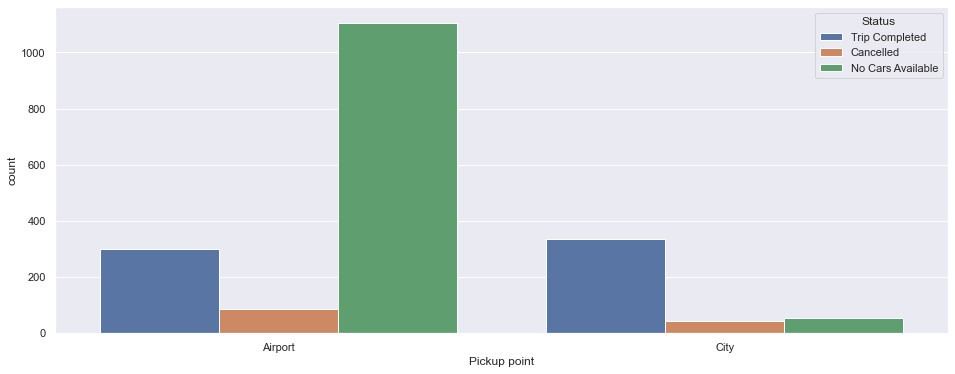

In [48]:
evening_rush = df[df['Time_slot'] == 'Evening_Time']
sns.countplot(x = 'Pickup point', hue = 'Status', data = evening_rush)

### Observations :

No cars available situation is a problem for the trip from airport to city in evening hours.

In [49]:
df['supply_demand'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in df['Status']]
df.head()

,Request id,Pickup point,Driver id,Status,RequestTimestamp,DropTimestamp,Request Hour,weekday,Time_slot,supply_demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Monday,Daytime,Supply
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Monday,Daytime,Supply
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Wednesday,Morning_Time,Supply
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Wednesday,Evening_Time,Supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,Morning_Time,Supply


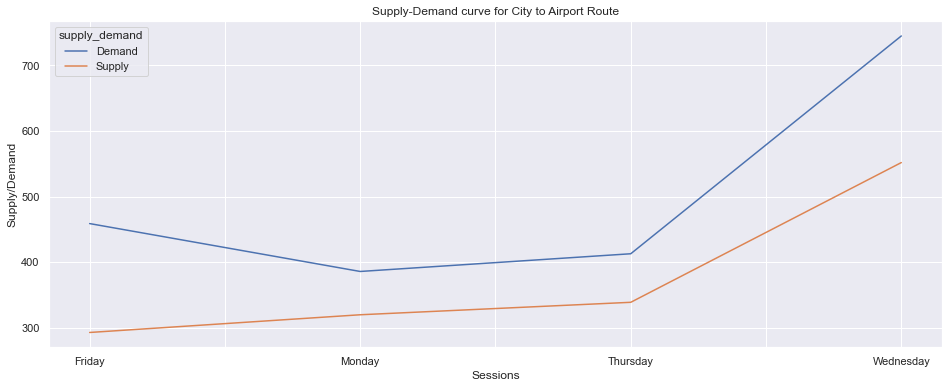

In [50]:
#Plotting Supply and Demand on the City to Airport Route
df_citytoairport=df[df["Pickup point"].str.contains('City')==True]
df_citytoairport.groupby(['weekday','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(16,6))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

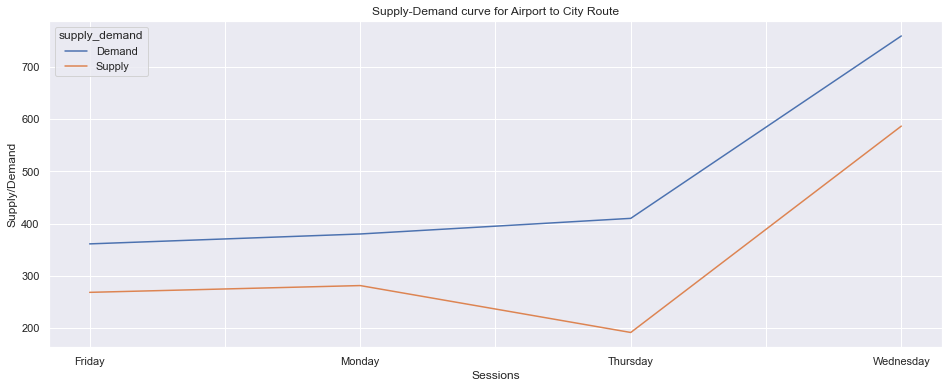

In [51]:
df_airporttocity=df[df["Pickup point"].str.contains('Airport')==True]
df_airporttocity.groupby(['weekday','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(16,6))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Sessions')
plt.ylabel('Supply/Demand')
plt.show()

## Conclusions :

Pickup Point - City :
As per the uber data analysis , morning time slot where the most number of requested cab is going to be cancelled by the driver . Reason might be behind that due to morning rush in office time , driver getting lots of cab request within the city and they didn't want to go long journey to the airport , the driver would think more to go to the shortest trip within the city and try to earn more in the morning pickup time of rush.<br>

Pickup Point - Airport :
As per the uber analysis , the evening time slot where the requests being No Cars Available at the airport,the reason behind that not enough car available to service as cars might not be in the airport area due they are in the city and some of the drivers might have gone to home because its the night time and they didnt drive at the night time.<br>

Recommendations :
From Airport to city :
An Uber stand can be created at Airport where Cabs will available all the time, this will itself lower down the  No Cars Available status.<br>
From City to Airport :
Uber can give some small reward or something to the drives in the morning. This might attract drivers to go for Airport, this step can be helpful in reducing the number of cancellations during morning time for Airport.<br>
Penalty for driver cancelling Airport booking thrice a day , it will reduce the cancellation of rides from city to airport in the morning time.<br>
There is definately need of more cars for filling the Gap.